In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [209]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["xai_api_key"]=os.getenv("X_AI")


In [210]:
from langchain_groq import ChatGroq
from langchain_xai import ChatXAI
from langchain_openai import ChatOpenAI

#llm=ChatGroq(model="qwen-2.5-32b")
llm = ChatXAI(model="grok-2")
#llm=ChatOpenAI(model="gpt-4o")

In [190]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph,END
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from typing_extensions import TypedDict

In [ ]:
#OpenSource llm for code reviewer 
#Grog for reviewer
#llm=ChatGroq(model="qwen-2.5-32b")

In [191]:
class State(TypedDict, total=False):
    ObjectiveCode_UserInstruction: str
    Code: str
    Agent_UserInstruction: str 
    # Code_Standard_Checker: str
    # Code_Optimizer: str
    Feedback_Generator: str
    Summary: str
    # Code_Generator: str
    # Review_Report_Generator_Node: str

In [211]:
def get_user_input(state: State):
    ObjectiveCode_UserInstruction = input("Please enter the Objective of the code to be reviewed: ")
    Agent_UserInstruction = input("What Types of Code Reviews you want the Agent to perform, can choose mulitple option (e.g., Syntax,Formatting,Code Quality,Security,Optimization,Best Practices & Design Pattern etc. ): ")
    Code = input("Please enter the code that needs to be reviewed: ")
    print("Objective: ", ObjectiveCode_UserInstruction)
    # print("Agent Task: ", Agent_UserInstruction)
    # print("Code: ", Code_Issue_Identifier)
    return {"ObjectiveCode_UserInstruction": ObjectiveCode_UserInstruction, "Agent_UserInstruction": Agent_UserInstruction, "Code": Code}

In [212]:
def Code_review(state: State):
    """ Review teh code based on the input by user"""
    Objective = state["ObjectiveCode_UserInstruction"]
    Code = state["Code"]
    Agent_Task = state["Agent_UserInstruction"]
    review = llm.invoke(
        f" Review the code {Code} for {Objective} and review based on the Type of Code Review mentioned in {Agent_Task} and provide the feedback"
        f" Be strict Reviewer, if the code {Code} and {Objective} are not match mention accordingly"
        f" You should perform only the Type of Code Review mentioned in {Agent_Task} :"
        f'example if to perform Syntaxt review perform syntax reviewer and provide the feedback accordinly :'
        f'example if to perform Syntaxt review perform syntax reviewer and provide the feedback accordinly :'
                        )
    return {"Feedback_Generator": review.content}

In [213]:
def Summary_Generator(state: State):
    Objective = state["ObjectiveCode_UserInstruction"]
    Agent_Task = state["Agent_UserInstruction"]
    msg = llm.invoke(
        f"your task is to summarize the feedback provided by code reviewer,based on  {state['Feedback_Generator']}"
        f" be specific, brief and highlight only the mistakes when required, display the Objective {Objective} , and what was asked you to perforam {Agent_Task} and your Summary"
    )
    return {"Summary": msg.content}

In [214]:
# Graph
Codebuilder = StateGraph(State)



In [215]:
Codebuilder.add_node("get_user_input",get_user_input)
Codebuilder.add_node("Code_review",Code_review)
Codebuilder.add_node("Summary_Generator",Summary_Generator)


Codebuilder.add_edge(START, "get_user_input")
Codebuilder.add_edge("get_user_input","Code_review")
Codebuilder.add_edge("Code_review","Summary_Generator")
Codebuilder.add_edge("Summary_Generator", END)

graph = Codebuilder.compile()

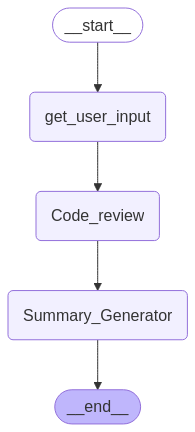

In [216]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [217]:
state = graph.invoke({"ObjectiveCode_UserInstruction": "","Code": "","Agent_UserInstruction": "","Feedback_Generator": "", "Summary": ""}) 

Objective:  Insert the table


In [218]:
state

{'ObjectiveCode_UserInstruction': 'Insert the table',
 'Code': 'CREATE TABLE  (     id INT PRIMARY KEY,     username VARCHAR(50) NOT NULL,     email VARCHAR(100) UNIQUE NOT NULL,     password_hash TEXT NOT NULL,     created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP );',
 'Agent_UserInstruction': 'Syntax',
 'Feedback_Generator': "To perform a code review based on the provided instructions, I'll conduct a syntax review of the given SQL code. Here's the review:\n\n**Syntax Review:**\n\nThe provided SQL code is for creating a table. Let's examine it step-by-step:\n\n```sql\nCREATE TABLE  (\n    id INT PRIMARY KEY,\n    username VARCHAR(50) NOT NULL,\n    email VARCHAR(100) UNIQUE NOT NULL,\n    password_hash TEXT NOT NULL,\n    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP\n);\n```\n\n1. **CREATE TABLE Statement:**\n   - The `CREATE TABLE` statement is correct.\n   - However, there's a missing table name immediately after `CREATE TABLE`. This is a syntax error. The correct syntax should be `

In [219]:
from IPython.display import Markdown
Markdown(state ['Feedback_Generator'])

To perform a code review based on the provided instructions, I'll conduct a syntax review of the given SQL code. Here's the review:

**Syntax Review:**

The provided SQL code is for creating a table. Let's examine it step-by-step:

```sql
CREATE TABLE  (
    id INT PRIMARY KEY,
    username VARCHAR(50) NOT NULL,
    email VARCHAR(100) UNIQUE NOT NULL,
    password_hash TEXT NOT NULL,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);
```

1. **CREATE TABLE Statement:**
   - The `CREATE TABLE` statement is correct.
   - However, there's a missing table name immediately after `CREATE TABLE`. This is a syntax error. The correct syntax should be `CREATE TABLE table_name (...)`. For example: `CREATE TABLE users (...)`

2. **Column Definitions:**
   - `id INT PRIMARY KEY`: Correct syntax for defining a primary key.
   - `username VARCHAR(50) NOT NULL`: Correct syntax for a non-nullable varchar column.
   - `email VARCHAR(100) UNIQUE NOT NULL`: Correct syntax for a unique, non-nullable varchar column.
   - `password_hash TEXT NOT NULL`: Correct syntax for a non-nullable text column.
   - `created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP`: Correct syntax for a timestamp column with a default value.

3. **General Syntax:**
   - The overall structure of the column definitions is correct.
   - The statement is terminated with a semicolon, which is correct.

4. **Additional Notes:**
   - The code doesn't include any INSERT statements as mentioned in the instructions. The review is focused solely on the CREATE TABLE statement provided.

**Feedback:**

1. **Critical Error:** The most significant issue is the missing table name after `CREATE TABLE`. This is a syntax error that will prevent the table from being created. To fix this, add a table name, e.g., `CREATE TABLE users (...)`

2. **Consistency:** The code is consistent in its use of data types and constraints. All required fields are marked as NOT NULL, which is good practice.

3. **Security:** Storing passwords as `password_hash` is a good practice, but ensure you're using a strong hashing algorithm like bcrypt or Argon2.

4. **Improvement Suggestion:** Consider adding an index on the `email` column if it will be frequently used in queries, even though it's already marked as UNIQUE.

5. **Missing INSERT Statement:** The instructions mentioned reviewing an INSERT statement, but no such statement was provided. If you intended to include an INSERT statement, please provide it for review.

In conclusion, while the column definitions and constraints are correctly implemented, the missing table name in the CREATE TABLE statement is a critical error that needs to be addressed before this SQL can be executed successfully.